# Pandasのgroupbyを使った要素をグループ化して処理をする方法

https://deepage.net/features/pandas-groupby.html

本記事では

* グループ分けした処理の概要
* groupby関数を使ったグルーピング
* グループごとに処理を実行する
* グラフのプロット

について解説していきます。



## グループ分けした処理の概要

groupby関数を使うことでどういったことが起こるのか、直感的に理解してみましょう。 例えばですが、以下のようにキーの値ごとの平均を求めたいとします。

下図をみてみると、まずキーの値ごとに値1をグループ分けします。

その後、それぞれのグループに対して 関数を適用します。 適用した結果を1つの配列にまとめて完成です。

![](./img/groupby.png "サンプル")

groupby関数がやっていることはただのグループ分けで、その後の処理は我々の方で自由に設定できます。

公式ドキュメントにも、Group Byを使った処理は

* Splitting : いくつかの階層を元にデータをグループ分けする
* Applying : それぞれのグループに関数を適用する
* Combining : 適用された結果を結合して1つのデータにまとめる

と記述されています。

この3ステップが基本となっており、 Applying ステップは更に以下のように大別できます。

* Aggregation : 平均やデータ個数といったグループにおける統計量を計算する。
* Transformation : グループごとのデータ処理(zscoreなど)を行う。
* Filteration : グループごとにフィルターをかけるなどのフィルタリングの処理を行う。
* 上記3つの組み合わせ

グループ分けを使うとこのような処理が可能となるわけです。

それではSplitting とApplying のステップについて詳しくみていきます。

Combining に関してはこちらから指定することはあまりないので省略します。

## groupby関数を使ってデータをグループ分けする(Splitting)

まずはgroupby関数を使ってグループ分けを行なっていきましょう。

以下のようなデータを使います。

```
class,sex,weight,height,time
A,F,45,150,85
A,M,50,160,80
A,F,55,155,74
B,M,78,180,90
B,F,51,158,65
B,M,40,155,68
C,F,80,185,90
C,M,86,175,81
C,F,52,162,73
```
まずはcsvファイルを読み込みます。


In [2]:
import pandas as pd

df = pd.read_csv("sample_group.csv") # まずはcsvファイルを読み込む
df

,class,sex,weight,height,time
0,A,F,45,150,85
1,A,M,50,160,80
2,A,F,55,155,74
3,B,M,78,180,90
4,B,F,51,158,65
5,B,M,40,155,68
6,C,F,80,185,90
7,C,M,86,175,81
8,C,F,52,162,73


### 列データからグループ分け

groupby関数を使ってGroupByオブジェクトを生成します。 まずは列データからグループオブジェクトを作成する方法です。 カラム名を指定します。

In [3]:
class_groupby = df.groupby("class") # classでグループ分けする

class_groupby # GroupByオブジェクトになる。

In [4]:
class_groupby.groups # グループの内訳を見ることができる

{'A': Int64Index([0, 1, 2], dtype='int64'),
 'B': Int64Index([3, 4, 5], dtype='int64'),
 'C': Int64Index([6, 7, 8], dtype='int64')}

In [5]:
class_groupby.get_group('A') # get_groupでグループ名を指定するとグループ内のデータを確認できる

,class,sex,weight,height,time
0,A,F,45,150,85
1,A,M,50,160,80
2,A,F,55,155,74


### 複数の列データから作成

複数のラベルを引き渡すことも可能です。


In [6]:
multi_groupby = df.groupby(["class","sex"])
multi_groupby.groups

{('A', 'F'): Int64Index([0, 2], dtype='int64'),
 ('A', 'M'): Int64Index([1], dtype='int64'),
 ('B', 'F'): Int64Index([4], dtype='int64'),
 ('B', 'M'): Int64Index([3, 5], dtype='int64'),
 ('C', 'F'): Int64Index([6, 8], dtype='int64'),
 ('C', 'M'): Int64Index([7], dtype='int64')}

In [7]:
multi_groupby.get_group(('A','F'))

,class,sex,weight,height,time
0,A,F,45,150,85
2,A,F,55,155,74


### Indexの値を使う

次にインデックスラベルの値を使っていきます。 まずはclassの値をインデックスラベルにしましょう。

set_index関数で設定可能です。


In [8]:
index_df = df.set_index('class')

index_df

,sex,weight,height,time
class,,,,
A,F,45,150,85
A,M,50,160,80
A,F,55,155,74
B,M,78,180,90
B,F,51,158,65
B,M,40,155,68
C,F,80,185,90
C,M,86,175,81
C,F,52,162,73


これをインデックスラベルの値を元にグループ分けすることが可能です。 Indexオブジェクトのnameである"class"を指定するので列データを指定するのと同じ要領で行うことが可能です。 また、インデックスラベルの場合、level=0と指定することでもGroupByオブジェクトを作ることが可能です。

In [9]:
index_groupby2 = index_df.groupby(level=0)
index_groupby2.groups

{'A': Index(['A', 'A', 'A'], dtype='object', name='class'),
 'B': Index(['B', 'B', 'B'], dtype='object', name='class'),
 'C': Index(['C', 'C', 'C'], dtype='object', name='class')}

### MultiIndexでグループ分け

今度はMultiIndexをラベルにもつデータをグループ分けします。 "class"と"sex"の2つの列データを使ってMultiIndexを作成します。


In [10]:
multi_df = df.set_index(["class", "sex"])
multi_df

weight  height  time
class sex                      
A     F        45     150    85
      M        50     160    80
      F        55     155    74
B     M        78     180    90
      F        51     158    65
      M        40     155    68
C     F        80     185    90
      M        86     175    81
      F        52     162    73

level引数でMultiIndexの階層を指定します。

In [11]:
in_df = multi_df.groupby(level="sex") # level=-1かlevel=1でも可能
in_df.groups

{'F': MultiIndex([('A', 'F'),
             ('A', 'F'),
             ('B', 'F'),
             ('C', 'F'),
             ('C', 'F')],
            names=['class', 'sex']), 'M': MultiIndex([('A', 'M'),
             ('B', 'M'),
             ('B', 'M'),
             ('C', 'M')],
            names=['class', 'sex'])}

In [12]:
in_df_2 = multi_df.groupby("sex") # level引数を使わずに直接名称を指定することも可能
in_df_2.groups

{'F': MultiIndex([('A', 'F'),
             ('A', 'F'),
             ('B', 'F'),
             ('C', 'F'),
             ('C', 'F')],
            names=['class', 'sex']), 'M': MultiIndex([('A', 'M'),
             ('B', 'M'),
             ('B', 'M'),
             ('C', 'M')],
            names=['class', 'sex'])}

複数指定することも可能です。

In [13]:
multi_in_group = multi_df.groupby(level=[0,1])
multi_in_group.groups

{('A', 'F'): MultiIndex([('A', 'F'),
             ('A', 'F')],
            names=['class', 'sex']), ('A', 'M'): MultiIndex([('A', 'M')],
            names=['class', 'sex']), ('B', 'F'): MultiIndex([('B', 'F')],
            names=['class', 'sex']), ('B', 'M'): MultiIndex([('B', 'M'),
             ('B', 'M')],
            names=['class', 'sex']), ('C', 'F'): MultiIndex([('C', 'F'),
             ('C', 'F')],
            names=['class', 'sex']), ('C', 'M'): MultiIndex([('C', 'M')],
            names=['class', 'sex'])}

In [14]:
multi_in_group_2 = multi_df.groupby(["class","sex"])
multi_in_group_2.groups

{('A', 'F'): MultiIndex([('A', 'F'),
             ('A', 'F')],
            names=['class', 'sex']), ('A', 'M'): MultiIndex([('A', 'M')],
            names=['class', 'sex']), ('B', 'F'): MultiIndex([('B', 'F')],
            names=['class', 'sex']), ('B', 'M'): MultiIndex([('B', 'M'),
             ('B', 'M')],
            names=['class', 'sex']), ('C', 'F'): MultiIndex([('C', 'F'),
             ('C', 'F')],
            names=['class', 'sex']), ('C', 'M'): MultiIndex([('C', 'M')],
            names=['class', 'sex'])}

### GroupByオブジェクトの中身を確認する

groupby関数によって生成されたGroupByオブジェクトが意図したものになっているかどうかを調べるには属性を使って確かめることができます。

.groupsで幾つのグループに分けられたのかとグループ名を確かめることができ、

.get_group(グループ名)でグループ内のデータを確かめることが可能です。

In [15]:
class_groupby = df.groupby("class") # classでグループ分けする
class_groupby # GroupByオブジェクトになる。

In [16]:
class_groupby.groups # グループの内訳を見ることができる

{'A': Int64Index([0, 1, 2], dtype='int64'),
 'B': Int64Index([3, 4, 5], dtype='int64'),
 'C': Int64Index([6, 7, 8], dtype='int64')}

In [17]:
class_groupby.get_group('A') # get_groupでグループ名を指定するとグループ内のデータを確認できる

,class,sex,weight,height,time
0,A,F,45,150,85
1,A,M,50,160,80
2,A,F,55,155,74


### GroupByオブジェクトをイテレータとして扱う
イテレータとして使うことも可能です。

In [18]:
for name, group in class_groupby: # nameでグループ名を受け取り、groupでグループの中身を受け取る
    print(name)
    print(group)

A
  class sex  weight  height  time
0     A   F      45     150    85
1     A   M      50     160    80
2     A   F      55     155    74
B
  class sex  weight  height  time
3     B   M      78     180    90
4     B   F      51     158    65
5     B   M      40     155    68
C
  class sex  weight  height  time
6     C   F      80     185    90
7     C   M      86     175    81
8     C   F      52     162    73


### 特定の列データを指定する

複数の列データが存在しているので、1つだけに指定します。 これは通常のDataFrameにおいて列データを指定する場合と変わりません。

In [19]:
class_groupby['weight'].mean() # classでグループ分けしたデータの'weight'だけ取ってくる

class
A    50.000000
B    56.333333
C    72.666667
Name: weight, dtype: float64

## グループごとに処理を実行する(Applying)

では次はグループごとに処理を実行させていきます。

### Pandasの組み込み関数を使う

簡単なものとしてmean、max、min、count、stdでデータの概要を取得する関数があります。 .(関数)ですぐ使えます。

引き続き、以下のデータを使います。

In [20]:
df

,class,sex,weight,height,time
0,A,F,45,150,85
1,A,M,50,160,80
2,A,F,55,155,74
3,B,M,78,180,90
4,B,F,51,158,65
5,B,M,40,155,68
6,C,F,80,185,90
7,C,M,86,175,81
8,C,F,52,162,73


では"class"をキーにしてグループ分けをし、これらの関数を適用させていきます。

In [21]:
class_groupby = df.groupby("class")
class_groupby.mean()

,weight,height,time
class,,,
A,50.000000,155.000000,79.666667
B,56.333333,164.333333,74.333333
C,72.666667,174.000000,81.333333


In [22]:
class_groupby.max()

,sex,weight,height,time
class,,,,
A,M,55,160,85
B,M,78,180,90
C,M,86,185,90


In [23]:
class_groupby.count()

,sex,weight,height,time
class,,,,
A,3,3,3,3
B,3,3,3,3
C,3,3,3,3


describe関数を使えば一挙に取得できます。

In [24]:
class_groupby.describe().stack() # データを縦に並べるためにstack()関数を使った

weight      height       time
class                                        
A     count   3.000000    3.000000   3.000000
      mean   50.000000  155.000000  79.666667
      std     5.000000    5.000000   5.507571
      min    45.000000  150.000000  74.000000
      25%    47.500000  152.500000  77.000000
      50%    50.000000  155.000000  80.000000
      75%    52.500000  157.500000  82.500000
      max    55.000000  160.000000  85.000000
B     count   3.000000    3.000000   3.000000
      mean   56.333333  164.333333  74.333333
      std    19.553346   13.650397  13.650397
      min    40.000000  155.000000  65.000000
      25%    45.500000  156.500000  66.500000
      50%    51.000000  158.000000  68.000000
      75%    64.500000  169.000000  79.000000
      max    78.000000  180.000000  90.000000
C     count   3.000000    3.000000   3.000000
      mean   72.666667  174.000000  81.333333
      std    18.147543   11.532563   8.504901
      min    52.000000  162.000000  73.000000
      25%    66.000000  168.500000  77.000000
      50%    80.000000  175.000000  81.000000
      75%    83.000000  180.000000  85.500000
      max    86.000000  185.000000  90.000000

複数ラベルがついているものについても同様です。 以下のGroupByオブジェクトを使用します。 “class”と”sex”の2つのキーを元にグループ分けされたものです。

In [25]:
multi_in_group.groups

{('A', 'F'): MultiIndex([('A', 'F'),
             ('A', 'F')],
            names=['class', 'sex']), ('A', 'M'): MultiIndex([('A', 'M')],
            names=['class', 'sex']), ('B', 'F'): MultiIndex([('B', 'F')],
            names=['class', 'sex']), ('B', 'M'): MultiIndex([('B', 'M'),
             ('B', 'M')],
            names=['class', 'sex']), ('C', 'F'): MultiIndex([('C', 'F'),
             ('C', 'F')],
            names=['class', 'sex']), ('C', 'M'): MultiIndex([('C', 'M')],
            names=['class', 'sex'])}

In [26]:
multi_in_group.mean()

weight  height  time
class sex                      
A     F      50.0   152.5  79.5
      M      50.0   160.0  80.0
B     F      51.0   158.0  65.0
      M      59.0   167.5  79.0
C     F      66.0   173.5  81.5
      M      86.0   175.0  81.0

In [27]:
 multi_in_group.describe().stack()

weight      height       time
class sex                                        
A     F   count   2.000000    2.000000   2.000000
          mean   50.000000  152.500000  79.500000
          std     7.071068    3.535534   7.778175
          min    45.000000  150.000000  74.000000
          25%    47.500000  151.250000  76.750000
          50%    50.000000  152.500000  79.500000
          75%    52.500000  153.750000  82.250000
          max    55.000000  155.000000  85.000000
      M   count   1.000000    1.000000   1.000000
          mean   50.000000  160.000000  80.000000
          min    50.000000  160.000000  80.000000
          25%    50.000000  160.000000  80.000000
          50%    50.000000  160.000000  80.000000
          75%    50.000000  160.000000  80.000000
          max    50.000000  160.000000  80.000000
B     F   count   1.000000    1.000000   1.000000
          mean   51.000000  158.000000  65.000000
          min    51.000000  158.000000  65.000000
          25%    51.000000  158.000000  65.000000
          50%    51.000000  158.000000  65.000000
          75%    51.000000  158.000000  65.000000
          max    51.000000  158.000000  65.000000
      M   count   2.000000    2.000000   2.000000
          mean   59.000000  167.500000  79.000000
          std    26.870058   17.677670  15.556349
          min    40.000000  155.000000  68.000000
          25%    49.500000  161.250000  73.500000
          50%    59.000000  167.500000  79.000000
          75%    68.500000  173.750000  84.500000
          max    78.000000  180.000000  90.000000
C     F   count   2.000000    2.000000   2.000000
          mean   66.000000  173.500000  81.500000
          std    19.798990   16.263456  12.020815
          min    52.000000  162.000000  73.000000
          25%    59.000000  167.750000  77.250000
          50%    66.000000  173.500000  81.500000
          75%    73.000000  179.250000  85.750000
          max    80.000000  185.000000  90.000000
      M   count   1.000000    1.000000   1.000000
          mean   86.000000  175.000000  81.000000
          min    86.000000  175.000000  81.000000
          25%    86.000000  175.000000  81.000000
          50%    86.000000  175.000000  81.000000
          75%    86.000000  175.000000  81.000000
          max    86.000000  175.000000  81.000000

使える組み込み関数の一覧は以下の通りです。

|  関数名  |  説明  |
| ---- | ---- |
|  mean()	  |  平均を計算します  |
|  sum()	  |  合計を計算します  |
|  size()	  |  グループの大きさを計算します  |
|  count()	  |  グループのデータの個数を計算します  |
|  std()	  |  標準偏差を計算します  |
|  var()	  |  分散を計算します  |
|  sem()	  |  平均値の標準誤差を計算します  |
|  describe()	  |  グループ内の統計量を返します  |
|  first()	  |  グループ内の先頭の値を返します  |
|  last()	  |  グループ内の最後の値を返します  |
|  nth()	  |  n番目の要素を返します。リストで指定することも可  |
|  min()	  |  最小値を返します  |
|  max()	  |  最大値を返します  |


### apply関数を使って適用させる

In [2]:
import pandas as pd

df = pd.read_csv("sample_group.csv") # まずはcsvファイルを読み込む
df

,class,sex,weight,height,time
0,A,F,45,150,85
1,A,M,50,160,80
2,A,F,55,155,74
3,B,M,78,180,90
4,B,F,51,158,65
5,B,M,40,155,68
6,C,F,80,185,90
7,C,M,86,175,81
8,C,F,52,162,73


In [3]:
def max_min(group):
    return group.max() - group.min()

df.groupby("class")[['weight','height']].apply(max_min)

,weight,height
class,,
A,10,10
B,38,25
C,34,23


辞書形式で出力させるとMultiIndexが出来上がります。

In [4]:
def stats(group):
    return {"mean" : group.mean(), "max": group.max(), "min" : group.min(), "count" : group.count()}

df.groupby("sex")["time"].apply(stats)

sex       
F    mean     77.40
     max      90.00
     min      65.00
     count     5.00
M    mean     79.75
     max      90.00
     min      68.00
     count     4.00
Name: time, dtype: float64

### 複数の関数を一度に適用させる

複数関数を適用したい時はagg関数が使えます。

In [5]:
import numpy as np

df.groupby("class")["weight"].agg([np.sum,np.mean])

,sum,mean
class,,
A,150,50.000000
B,169,56.333333
C,218,72.666667


### 列ごとに処理を指定する

agg関数を使えば列ごとに処理を指定することも可能です。

辞書形式で指定していき、キーで列を指定し、値で処理を実行したい関数を指定します。

In [6]:
df.groupby("class").agg({"weight": np.mean, "height": np.max, "time": lambda x: np.std(x)})

,weight,height,time
class,,,
A,50.000000,160,4.496913
B,56.333333,180,11.145502
C,72.666667,185,6.944222


### transform関数を使ったデータ整形

transform関数を使ってデータの中身を処理します。

zscoreを計算してみましょう。

In [7]:
zscore = lambda x : (x - x.mean())/x.std()

df.groupby("class")["weight"].transform(zscore) # グループ内で処理

0   -1.000000
1    0.000000
2    1.000000
3    1.108080
4   -0.272758
5   -0.835322
6    0.404095
7    0.734718
8   -1.138813
Name: weight, dtype: float64

In [8]:
df["weight"].transform(zscore) # データ全体で処理

0   -0.866123
1   -0.570854
2   -0.275585
3    1.082654
4   -0.511800
5   -1.161393
6    1.200762
7    1.555085
8   -0.452746
Name: weight, dtype: float64

### フィルタリング
グループごとにフィルターをかけていきましょう。 それぞれのグループの最大値の一定割合より最小値が大きいグループだけを表示させます。

In [9]:
df.groupby("class")["weight"].filter(lambda x: x.min() > x.max()/1.3)

0    45
1    50
2    55
Name: weight, dtype: int64

## グラフにプロットする

最後に、GroupByオブジェクトに対して処理を施した結果をグラフにしてみやすくしましょう。

.plotで可能です。

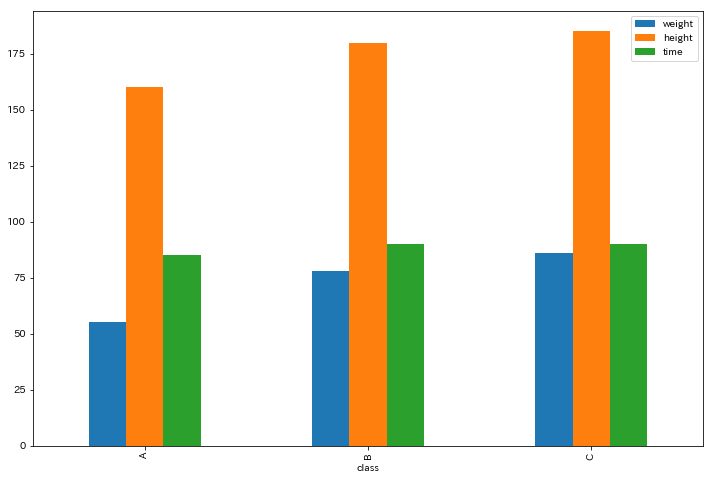

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
df.groupby("class")[["weight","height","time"]].max().plot.bar(ax=ax)
fig.savefig("img/group_sum.png")

## まとめ

今回はグルーピングの処理についてまとめました。 グルーピングの処理ではデータを分けるSplitting、処理を実行するApplying、結果を結合するCombiningの3つのステップに分かれていると冒頭で説明しました。この処理の流れが頭の中で把握しているとGroupByオブジェクトを利用する際にあまり混乱が生じずに済むかと思います。

groupby関数を使ったグループ分けの処理は色々な使い道があり、これを使いこなせるようになるとデータ処理がかなり楽にできるようになるはずです。